In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [9]:
dir=1
err=100
obs=pd.read_csv(f'./{dir}/{err}/obs.csv',header=None)

In [10]:
obs.head(10)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
8,1,0,0,0,1,0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
9,0,0,0,1,0,0,1,1,0,0,...,1,1,0,0,0,1,0,0,1,0


In [11]:
nature=pd.read_csv(f'{dir}/nature.csv',header=None)

In [12]:
nature.head(10)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9,1,0,0,1,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [13]:
nature['epi']=nature.sum(axis=1)

In [14]:
nature

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,epi
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,1,1,1,1,0,0,1,1,...,0,1,0,1,1,0,1,0,0,29
96,0,1,1,1,1,1,0,0,1,1,...,0,1,1,1,1,1,1,0,0,30
97,0,1,1,1,1,1,1,0,0,1,...,1,1,1,1,1,1,1,0,0,30
98,0,1,1,0,1,1,1,0,1,0,...,1,0,1,1,0,1,1,1,1,27


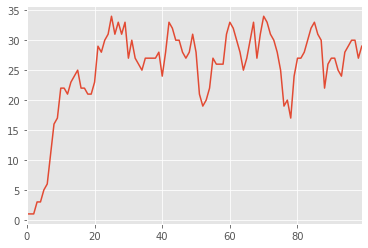

In [16]:
nature['epi'].plot()

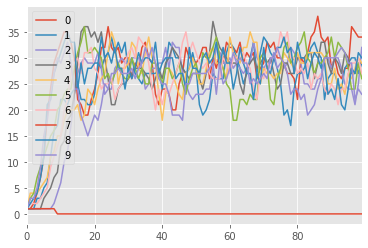

In [18]:
for dir in range(10):
    nature=pd.read_csv(f'{dir}/nature.csv',header=None)
    nature['epi']=nature.sum(axis=1)
    nature['epi'].plot(label=f'{dir}')
    plt.legend()

### Threat score

In [9]:
def threat(pf):
    TP=0
    TN=0
    FP=0
    FN=0
    for index,row in pf.iterrows():
        if row['State']==row['Nature']:
            if row['State']==row['Obs']:
                TN+=1
            elif row['State']!=row['Obs']:
                TP+=1
        elif row['State']!=row['Nature']:
            if row['State']==row['Obs']:
                FN+=1
            elif row['State']!=row['Obs']:
                FP+=1
    #return [TP,FP,FN,TN]
    return TP/(TP+FP+FN)

In [13]:
dir=3
err=100
th=pd.DataFrame(columns=['Threat'])
for time in range(99):
    pf=pd.read_csv(f'{dir}/{err}/{time}_pf.csv')
    th_time=pd.Series([threat(pf)],index=th.columns)
    th=th.append(th_time,ignore_index=True)

Threat    0.313219
dtype: float64

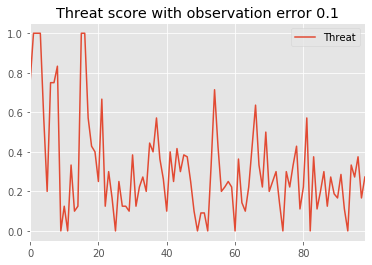

In [14]:
th.plot()
#nature['epi'].plot(label='Nature epidemic curve') 
plt.title(f'Threat score with observation error {err/1000}')
plt.legend()
plt.savefig('Threat.png')
th.mean()

In [12]:
pf.head()

,ID,S,I,State,Nature,Obs
0,0,0,500,1,1,1
1,1,0,500,1,1,0
2,2,497,3,0,0,0
3,3,0,500,1,1,1
4,4,427,73,0,1,1


In [38]:
threat(pf)

[5, 4, 2, 29]